In [1]:
import wave
import numpy as np
import matplotlib.pyplot as plt

In [2]:
wav_file = wave.open('morse_encoded.wav', "rb") 

sample_rate = wav_file.getframerate()  # Samples per second
n_frames = wav_file.getnframes()
print("Sample rate:", sample_rate)
print("Number of frames:", n_frames)
audio_data = wav_file.readframes(n_frames)
audio_signal = np.frombuffer(audio_data, dtype=np.int16)


Sample rate: 8000
Number of frames: 30000


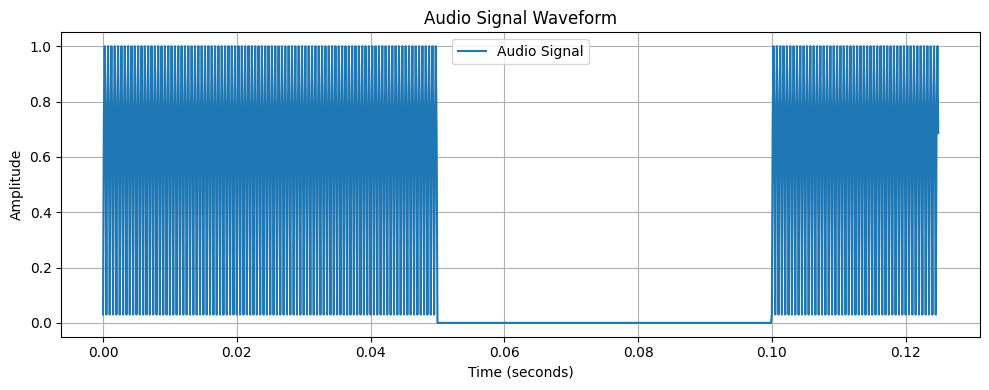

In [16]:
time = np.linspace(0, len(audio_signal) / sample_rate, num=len(audio_signal))
plt.figure(figsize=(10, 4))
plt.plot(time[0:1000], audio_signal[0:1000], label="Audio Signal")
plt.title("Audio Signal Waveform")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

In [4]:
import numpy as np
import wave

# Define the duration of dots, dashes, and spaces (in seconds)
dot_duration = 0.05
dash_duration = 3 * dot_duration
intra_char_space_duration = dot_duration
inter_char_space_duration = 3 * dot_duration
word_space_duration = 7 * dot_duration

# Define the sample rate
sample_rate = 8000

# Function to generate a sine wave for a given duration and frequency
def generate_sine_wave(frequency, duration, sample_rate):
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    return 0.5 * np.sin(2 * np.pi * frequency * t +  0.03)

# Function to generate the waveform for a Morse code symbol
def morse_to_waveform(morse_code, sample_rate):
    frequency = 1000  # Frequency of the tone (in Hz)
    waveform = np.array([])

    for symbol in morse_code:
        if symbol == '.':
            waveform = np.concatenate((waveform, generate_sine_wave(frequency, dot_duration, sample_rate)))
        elif symbol == '-':
            waveform = np.concatenate((waveform, generate_sine_wave(frequency, dash_duration, sample_rate)))
        elif symbol == ' ':
            waveform = np.concatenate((waveform, np.zeros(int(sample_rate * inter_char_space_duration))))
        elif symbol == '/':
            waveform = np.concatenate((waveform, np.zeros(int(sample_rate * word_space_duration))))
        
        # Add intra-character space after each dot or dash
        if symbol in ['.', '-']:
            waveform = np.concatenate((waveform, np.zeros(int(sample_rate * intra_char_space_duration))))

    return waveform

# Convert the result_string to waveform
morse_waveform = morse_to_waveform('.... . .-.. .-.. --- / - .... .. ... / .. ... / -. --- - / .. -', sample_rate)

# Normalize the waveform to the range of int16
morse_waveform = np.int16(morse_waveform / np.max(np.abs(morse_waveform)) * 32767)

# Save the waveform to a WAV file
with wave.open('morse_encoded.wav', 'w') as wav_file:
    wav_file.setnchannels(1)
    wav_file.setsampwidth(2)
    wav_file.setframerate(sample_rate)
    wav_file.writeframes(morse_waveform.tobytes())

In [5]:
audio_signal = audio_signal / np.max(np.abs(audio_signal))
audio_signal[ 1:200]

array([ 0.72832423,  0.99996948,  0.68587298, -0.02999969, -0.72832423,
       -0.99996948, -0.68587298,  0.02999969,  0.72832423,  0.99996948,
        0.68587298, -0.02999969, -0.72832423, -0.99996948, -0.68587298,
        0.02999969,  0.72832423,  0.99996948,  0.68587298, -0.02999969,
       -0.72832423, -0.99996948, -0.68587298,  0.02999969,  0.72832423,
        0.99996948,  0.68587298, -0.02999969, -0.72832423, -0.99996948,
       -0.68587298,  0.02999969,  0.72832423,  0.99996948,  0.68587298,
       -0.02999969, -0.72832423, -0.99996948, -0.68587298,  0.02999969,
        0.72832423,  0.99996948,  0.68587298, -0.02999969, -0.72832423,
       -0.99996948, -0.68587298,  0.02999969,  0.72832423,  0.99996948,
        0.68587298, -0.02999969, -0.72832423, -0.99996948, -0.68587298,
        0.02999969,  0.72832423,  0.99996948,  0.68587298, -0.02999969,
       -0.72832423, -0.99996948, -0.68587298,  0.02999969,  0.72832423,
        0.99996948,  0.68587298, -0.02999969, -0.72832423, -0.99

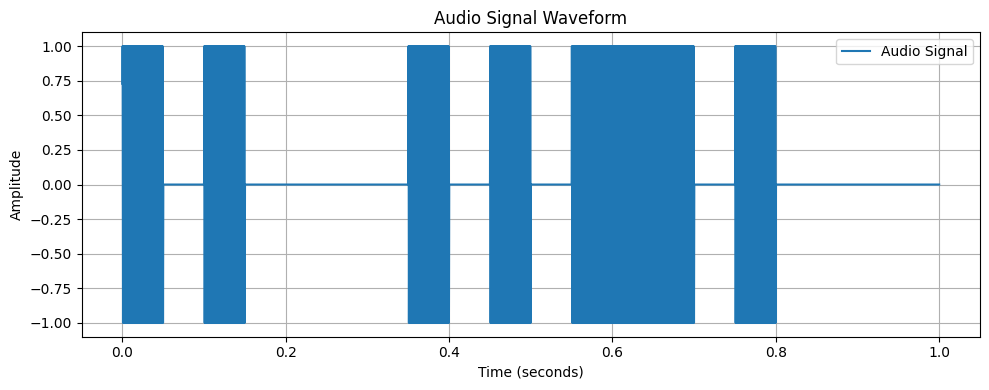

In [6]:
time = np.linspace(0, len(audio_signal) / sample_rate, num=len(audio_signal))
plt.figure(figsize=(10, 4))
plt.plot(time[1:8000], audio_signal[1:8000], label="Audio Signal")
plt.title("Audio Signal Waveform")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

In [7]:
audio_signal = np.abs(audio_signal) 


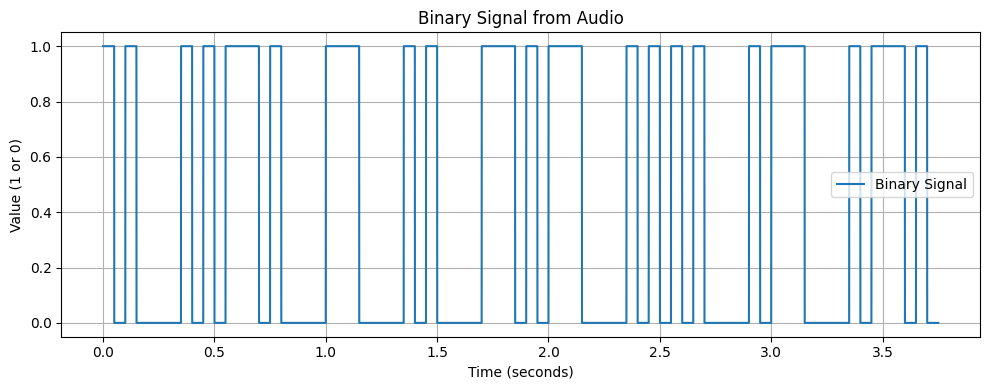

In [8]:

threshold = 0.00

# Apply the condition: values > -0.40 are set to 1, others to 0
binary_signal = np.where(audio_signal > threshold, 1, 0)


# Optionally, plot the binary signal
import matplotlib.pyplot as plt

# Generate a time axis for the binary signal
time = np.linspace(0, len(audio_signal) / sample_rate, num=len(audio_signal))

plt.figure(figsize=(10, 4))
plt.plot(time, binary_signal, label="Binary Signal")
plt.title("Binary Signal from Audio")
plt.xlabel("Time (seconds)")
plt.ylabel("Value (1 or 0)")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

In [9]:
audio_signal[380:820]

array([0.02999969, 0.72832423, 0.99996948, 0.68587298, 0.02999969,
       0.72832423, 0.99996948, 0.68587298, 0.02999969, 0.72832423,
       0.99996948, 0.68587298, 0.02999969, 0.72832423, 0.99996948,
       0.68587298, 0.02999969, 0.72832423, 0.99996948, 0.68587298,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [10]:
# Print the result
list(binary_signal[710:730])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [11]:
result = []
Len = []
length = 0
length2 = 0
dash_threshold=1000

for bit in binary_signal:
    if bit == 1:
        length += 1  # Count consecutive 1s
        if length2 > 0:
            Len.append(length2)
            if length2 > 2000 :
                result.append(" / ") 
            elif length2 >400 and length2 < 2000:
                result.append(' ')
            length2 = 0
    else:
        length2 +=1
        if length > 0:
            Len.append(length)
            if length < dash_threshold and length > 0 :
                result.append('.')  # Longer duration is a dash
            
            elif length >= dash_threshold:
                result.append('-')  # Very long duration indicates a space
            length = 0  # Reset length counter




In [12]:
char_array = result
result_string = ''.join(char_array)

result_string

'.. ..-. - .. -.- .... .- .-.'

In [13]:
encode_table = {
    'A': '.-', 'B': '-...', 'C': '-.-.', 'D': '-..', 'E': '.', 'F': '..-.',
    'G': '--.', 'H': '....', 'I': '..', 'J': '.---', 'K': '-.-', 'L': '.-..',
    'M': '--', 'N': '-.', 'O': '---', 'P': '.--.', 'Q': '--.-', 'R': '.-.',
    'S': '...', 'T': '-', 'U': '..-', 'V': '...-', 'W': '.--', 'X': '-..-',
    'Y': '-.--', 'Z': '--..', '1': '.----', '2': '..---', '3': '...--',
    '4': '....-', '5': '.....', '6': '-....', '7': '--...', '8': '---..',
    '9': '----.', '0': '-----', ', ': '--..--', '.': '.-.-.-', '?': '..--..',
    '/': '-..-.', '-': '-....-', '(': '-.--.', ')': '-.--.-', ' ': '/'
}


decode_table = {v: k for k, v in encode_table.items()}

def text_to_morse(text):
    return ' '.join(encode_table.get(char.upper(), '') for char in text)

def morse_to_text(morse):
    reversed_dict = {v: k for v, k in decode_table.items()}
    return ''.join(reversed_dict.get(code, '') for code in morse.split(' '))

In [14]:
morse_to_text(result_string)

'IFTIKHAR'

In [15]:
text_to_morse('hello this is not it')
import sounddevice as sd
sd.play(morse_waveform, sample_rate)
